# Pattern Recognition 

### - Multinomial Naive Bayes (NB), Gaussian NB, Decision Trees

### - Sequential Neural Networks with keras

In [2]:
# installing necessary packages
!pip install keras
!pip install tensorflow
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 293.3/293.3 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Check for missing values
0    0
1    0
2    0
dtype: int64


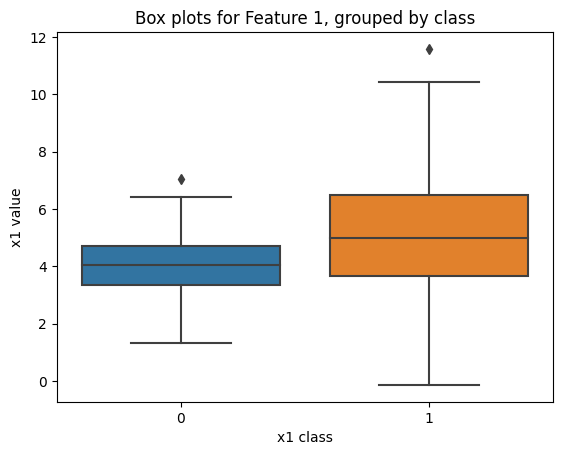

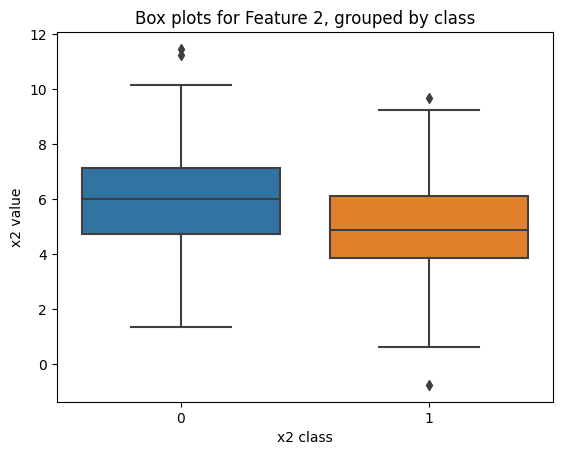

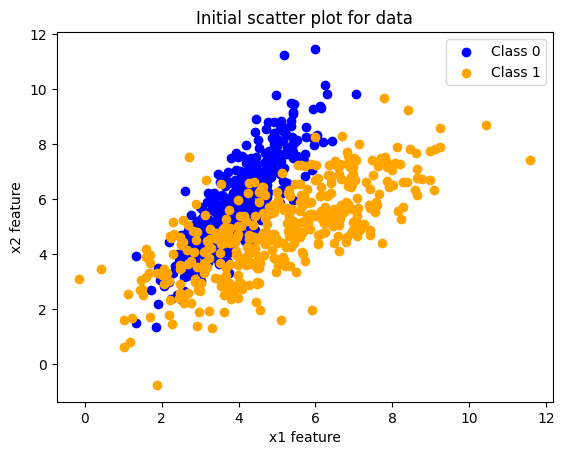

In [99]:
# Reading data from csv file and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Dataset.csv', header = None)
class0_data = df[df[2] == 0].to_numpy()
class1_data = df[df[2] == 1].to_numpy()

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Check for missing values
print("Check for missing values")
print(df.isnull().sum()) 

# Create box plots for feature1, grouped by class to check data distribution and outliers
plt.figure(1)
sns.boxplot(x=2, y=0, data=df)
plt.xlabel("x1 class")
plt.ylabel("x1 value")
plt.title("Box plots for Feature 1, grouped by class")

# Create box plots for feature2, grouped by class to check data distribution and outliers
plt.figure(2)
sns.boxplot(x=2, y=1, data=df)
plt.xlabel("x2 class")
plt.ylabel("x2 value")
plt.title("Box plots for Feature 2, grouped by class")

# Creating a scatter plot for data visualization
plt.figure(3)
plt.scatter(class0_data[:,0], class0_data[:,1], color='blue', label='Class 0')
plt.scatter(class1_data[:,0], class1_data[:,1], color='orange', label='Class 1')
plt.xlabel("x1 feature")
plt.ylabel("x2 feature")
plt.title("Initial scatter plot for data")
plt.legend()


plt.show()


In [101]:
# Create a function to split data to train and validation set
# Also it performs MinMaxScalling to the X data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# funcion for scaling X data in range(0,1)
def scaleDataset(dataset):
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    dataset_scaled = scaler.fit_transform(dataset)
    return dataset_scaled

#function for spliting Dataset to X_train, y_train and X_valid, y_valid for model training and validation
def splitDataset(df):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=40)
    y_train = y_train
    y_valid = y_valid

    X_train = scaleDataset(X_train)
    X_valid = scaleDataset(X_valid)
    return X_train, X_valid, y_train, y_valid
    

X_train, X_valid, y_train, y_valid = splitDataset(df)
print(X_train)

[[0.22594379 0.42341842]
 [0.55150799 0.5162643 ]
 [0.48523102 0.66767902]
 ...
 [0.31736402 0.44507006]
 [0.43701125 0.7256659 ]
 [0.36482403 0.63473778]]


In [102]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the probabilities for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)

    # Reshape the predictions to match the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary lines
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

In [104]:
# Implementing different classsification models and calculating metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Create a function that trains different classification models
def train_models(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {}
    
    # Multinomial Naive Bayes
    models['Multinomial NB'] = MultinomialNB()
    
    # Gaussian Naive Bayes
    models['Gaussian NB'] = GaussianNB()
    
    # Decision Trees
    models['Decision Trees'] = DecisionTreeClassifier()
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
      
        # Fit the classifier
        models[key].fit(input_X_train, input_y_train)
      
        # Make predictions
        predictions = models[key].predict(input_X_test)
      
        # Calculate metrics
        accuracy[key] = metrics.accuracy_score(predictions, input_y_test)
        precision[key] = metrics.precision_score(predictions, input_y_test)
        recall[key] = metrics.recall_score(predictions, input_y_test)
        f1[key] = metrics.f1_score(predictions, input_y_test)

        plot_decision_boundary(models[key], X, y)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
        plt.show()

    # Display metrics
    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['Recall'] = recall.values()
    df_model['F1'] = f1.values()

    df_model = df_model.round(4) * 100

    display(df_model)
    ax = df_model.plot.bar(rot=60)
    ax.legend(
        ncol=len(models.keys()), 
        bbox_to_anchor=(0, 1), 
        loc='lower left', 
        prop={'size': 12}
    )
    plt.tight_layout()

    return df_model


 --- Current model: Multinomial NB  ---



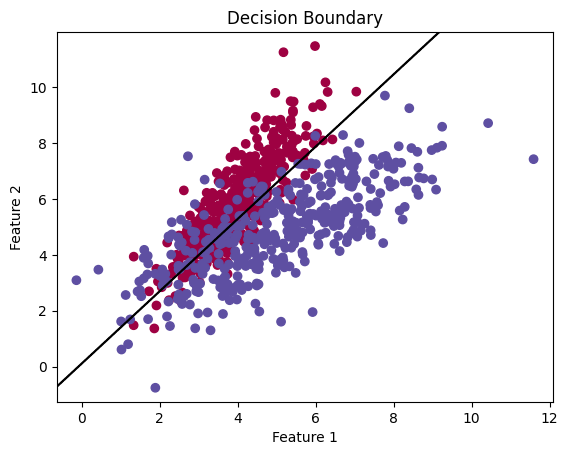


 --- Current model: Gaussian NB  ---



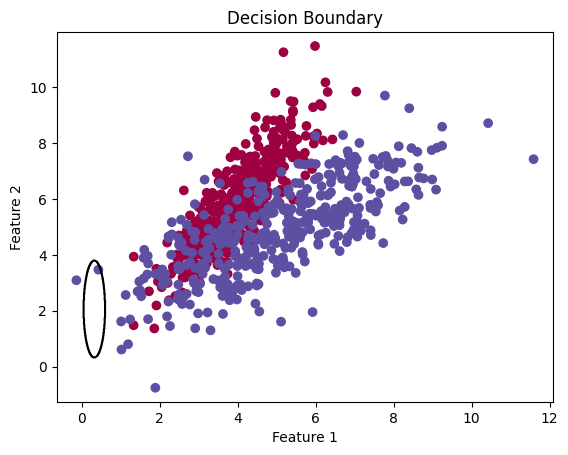


 --- Current model: Decision Trees  ---



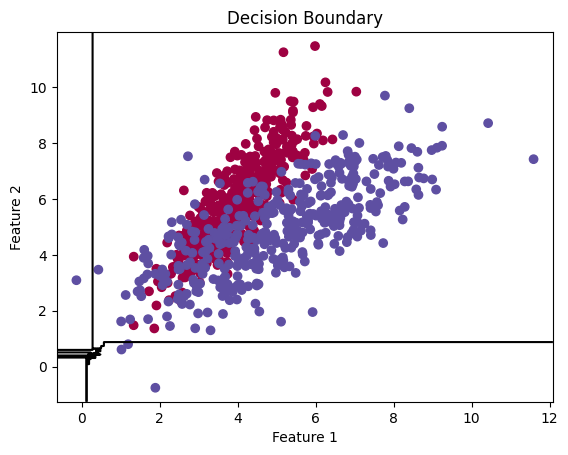

,Accuracy,Precision,Recall,F1
Multinomial NB,48.12,93.51,48.00,63.44
Gaussian NB,69.38,94.81,61.86,74.87
Decision Trees,63.12,93.51,57.14,70.94


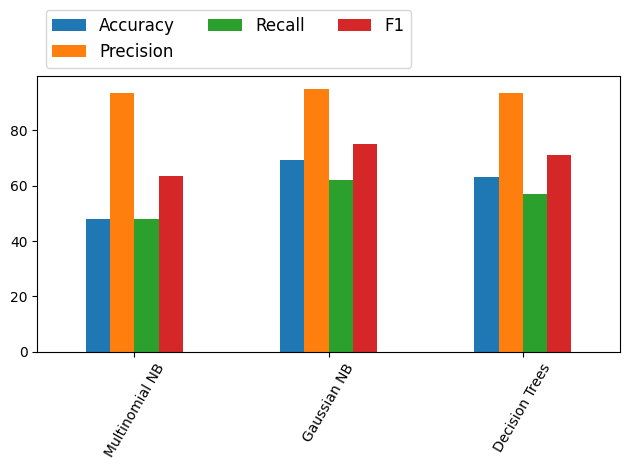

In [105]:
# Train models and display the results
CV_results = train_models(X_train, y_train, X_valid, y_valid)

In [106]:
# Create a function that trains different machine learning models with cross validation
from sklearn.model_selection import cross_validate
import statistics

# Same as before, using cross validation
def train_models_cv(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {}
    
    models['Multinomial NB'] = MultinomialNB()
    
    models['Gaussian NB'] = GaussianNB()
    
    models['Decision Trees'] = DecisionTreeClassifier()
    
    cv_results = {}
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        cv_results[key] = cross_validate(models[key], 
                                         X_train, 
                                         y_train, 
                                         cv=10
                                        )
        
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
        print("Mean score from 10 cross validation trainings:")
        display(statistics.mean(cv_results[key]['test_score']))


In [108]:
# Train models with cross validation
CV_results = train_models_cv(X_train, y_train, X_valid, y_valid)


 --- Current model: Multinomial NB  ---

Mean score from 10 cross validation trainings:


0.678125


 --- Current model: Gaussian NB  ---

Mean score from 10 cross validation trainings:


0.79375


 --- Current model: Decision Trees  ---

Mean score from 10 cross validation trainings:


0.7859375

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6973 - accuracy: 0.4953 - val_loss: 0.6906 - val_accuracy: 0.5188
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5063 - val_loss: 0.6907 - val_accuracy: 0.5437
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5422 - val_loss: 0.6896 - val_accuracy: 0.5500
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5578 - val_loss: 0.6881 - val_accuracy: 0.5750
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5781 - val_loss: 0.6874 - val_accuracy: 0.5938
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6234 - val_loss: 0.6865 - val_accuracy: 0.6125
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.6344 - val_loss: 0.6844 - val_accuracy: 0.6687
Epoch 8/100
2

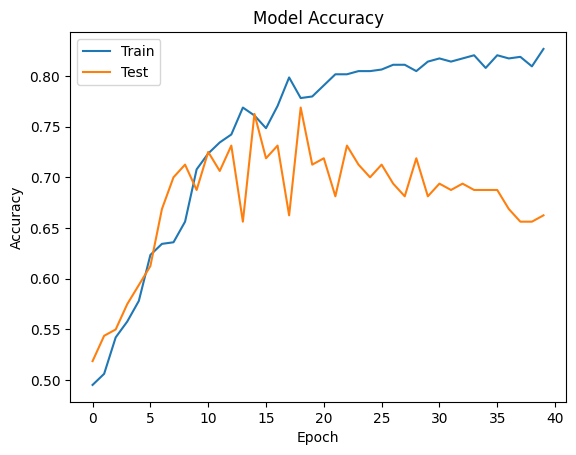

52671/52671 [==============================] - 42s 795us/step


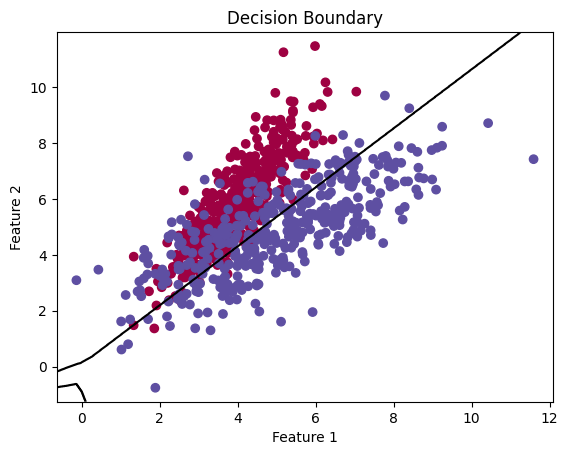

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model and collect history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Plot the accuracy on train and test sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the probabilities for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)

    # Reshape the predictions to match the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary lines
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Plot the decision boundary
plot_decision_boundary(model, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

Reasoning:
    According to the 'Model Accuracy' plot, we can tell that the model starts to overtrain, so the training is early stopped at epoch 40 instead of 100 to avoid loosing its generalization ability and therefore reduce the test accuracy even more. 

In [114]:
# Load testing data from DatasetVal.csv
# And creating predictions using best_model (NN)

test_data_df = pd.read_csv('DatasetVal.csv', header = None)
X_test = test_data_df.to_numpy()
X_test = scaleDataset(X_test)

# predict class probabilities for the X_test dataset
probabilities  = model.predict(X_test)

predictions = probabilities.round()

print(predictions)

7/7 [==============================] - 0s 2ms/step
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 

In [115]:
# load testing labels from Labels.csv
# And calculating accuracy

test_labels_df = pd.read_csv('Labels.csv', header = None)
y_real = test_labels_df.to_numpy()
n_correct = 0

for i in range(len(y_real)):
    if y_real[i] == predictions[i]:
        n_correct += 1

accuracy = n_correct / len(y_real)
print("\n --- Accuracy in testing data: ---\n")
print(accuracy)


 --- Accuracy in testing data: ---

0.755
